In [1]:
from sgp4.tests_ds import (build_sat_list,
                           build_df_from_tcppver,
                           build_df_from_og_pysgp4,
                           build_df_from_vect_pysgp4,
                           compare_two_sgp4_df,
                           compare_speed_vect_og)

from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid') # Set Plot Style
plt.style.use('seaborn-poster') # Set Plot Style

### Comparing Original Python (jit) SGP4 with C++ output

In [8]:
sat_list = build_sat_list()
tcppver_expected_df = build_df_from_tcppver()
og_pysgp4_df, og_pysgp4_errors = build_df_from_og_pysgp4(sat_list)
og_with_cpp_errors = compare_two_sgp4_df(og_pysgp4_df, og_pysgp4_errors, tcppver_expected_df)
print(og_with_cpp_errors)

{5: {'error': 0, 'error_message': None, 'method': 'n', 'compare': 'success'}, 4632: {'error': 0, 'error_message': None, 'method': 'd', 'compare': 'success'}, 6251: {'error': 0, 'error_message': None, 'method': 'n', 'compare': 'success'}, 8195: {'error': 0, 'error_message': None, 'method': 'd', 'compare': 'success'}, 9880: {'error': 0, 'error_message': None, 'method': 'd', 'compare': 'success'}, 9998: {'error': 0, 'error_message': None, 'method': 'd', 'compare': 'success'}, 11801: {'error': 0, 'error_message': None, 'method': 'd', 'compare': 'success'}, 14128: {'error': 0, 'error_message': None, 'method': 'd', 'compare': 'success'}, 16925: {'error': 0, 'error_message': None, 'method': 'd', 'compare': 'success'}, 20413: {'error': 0, 'error_message': None, 'method': 'd', 'compare': 'fail'}, 21897: {'error': 0, 'error_message': None, 'method': 'd', 'compare': 'success'}, 22312: {'error': 1, 'error_message': 'mean eccentricity -0.062956 not within range 0.0 <= e < 1.0', 'method': 'n', 'comp

### Comparing Vectorized (numpy) Python SGP4 with C++ output

In [9]:
sat_list = build_sat_list()
tcppver_expected_df = build_df_from_tcppver()
vect_pysgp4_df, vect_pysgp4_errors  = build_df_from_vect_pysgp4(sat_list)
vect_with_cpp_errors = compare_two_sgp4_df(vect_pysgp4_df, vect_pysgp4_errors, tcppver_expected_df)
print(vect_pysgp4_errors)

{5: {'error': [], 'error_message': [], 'method': 'n', 'compare': 'success'}, 4632: {'error': 0, 'error_message': None, 'method': 'd', 'compare': 'success'}, 6251: {'error': [], 'error_message': [], 'method': 'n', 'compare': 'success'}, 8195: {'error': 0, 'error_message': None, 'method': 'd', 'compare': 'success'}, 9880: {'error': 0, 'error_message': None, 'method': 'd', 'compare': 'success'}, 9998: {'error': 0, 'error_message': None, 'method': 'd', 'compare': 'success'}, 11801: {'error': 0, 'error_message': None, 'method': 'd', 'compare': 'success'}, 14128: {'error': 0, 'error_message': None, 'method': 'd', 'compare': 'success'}, 16925: {'error': 0, 'error_message': None, 'method': 'd', 'compare': 'success'}, 20413: {'error': 0, 'error_message': None, 'method': 'd', 'compare': 'fail'}, 21897: {'error': 0, 'error_message': None, 'method': 'd', 'compare': 'success'}, 22312: {'error': [1, 6], 'error_message': ['mean eccentricity of idx (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 1

### Comparing Vectorized (numpy) SGP4 with Original Python (jit) SGP4

In [10]:
sat_list = build_sat_list()
og_pysgp4_df, og_pysgp4_errors = build_df_from_og_pysgp4(sat_list)

sat_list = build_sat_list() # Make sure sat list is "fresh"
vect_pysgp4_df, vect_pysgp4_errors = build_df_from_vect_pysgp4(sat_list)
vect_with_og_errors = compare_two_sgp4_df(vect_pysgp4_df, vect_pysgp4_errors, og_pysgp4_df)
print(vect_with_og_errors)

{5: {'error': [], 'error_message': [], 'method': 'n', 'compare': 'success'}, 4632: {'error': 0, 'error_message': None, 'method': 'd', 'compare': 'success'}, 6251: {'error': [], 'error_message': [], 'method': 'n', 'compare': 'success'}, 8195: {'error': 0, 'error_message': None, 'method': 'd', 'compare': 'success'}, 9880: {'error': 0, 'error_message': None, 'method': 'd', 'compare': 'success'}, 9998: {'error': 0, 'error_message': None, 'method': 'd', 'compare': 'success'}, 11801: {'error': 0, 'error_message': None, 'method': 'd', 'compare': 'success'}, 14128: {'error': 0, 'error_message': None, 'method': 'd', 'compare': 'success'}, 16925: {'error': 0, 'error_message': None, 'method': 'd', 'compare': 'success'}, 20413: {'error': 0, 'error_message': None, 'method': 'd', 'compare': 'fail'}, 21897: {'error': 0, 'error_message': None, 'method': 'd', 'compare': 'success'}, 22312: {'error': [1, 6], 'error_message': ['mean eccentricity of idx (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 1

### Time testing for Near Earth satellite (`satrec.method = 'n'`)

In [11]:
len_tsince, vect_time, og_time = compare_speed_vect_og()

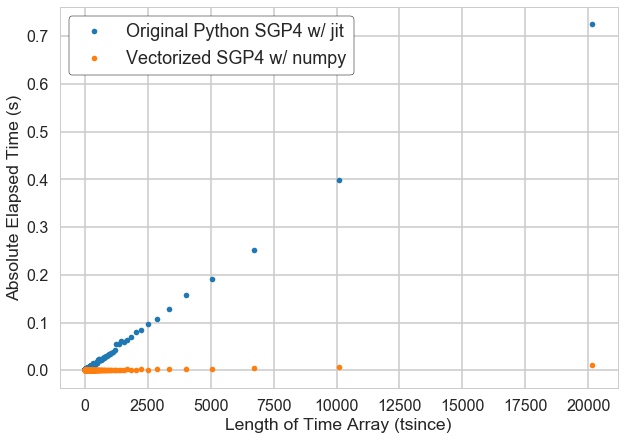

In [12]:
fig1,ax1 = plt.subplots()
ax1.plot(len_tsince,og_time,'.',label='Original Python SGP4 w/ jit',)
ax1.plot(len_tsince,vect_time,'.', label='Vectorized SGP4 w/ numpy')
ax1.set_xlabel('Length of Time Array (tsince)')
ax1.set_ylabel('Absolute Elapsed Time (s)')
leg = ax1.legend(fancybox=True,
                 framealpha=1,
                 frameon=True,
                 #loc = 'upper left',
                 #bbox_to_anchor=(1.04,1),
                 fontsize = 18)
leg.get_frame().set_edgecolor('k')
fig1.set_size_inches(10,7)

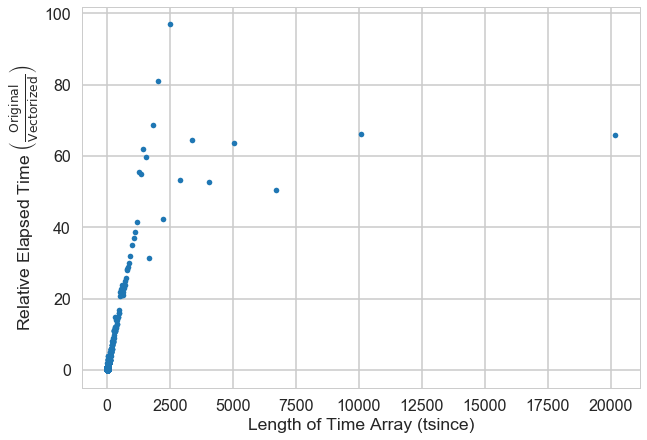

In [13]:
mask_vect = vect_time != 0.0
fig2,ax2 = plt.subplots()
ax2.plot(len_tsince[mask_vect],(og_time[mask_vect]/vect_time[mask_vect]),'.')
ax2.set_xlabel('Length of Time Array (tsince)')
ax2.set_ylabel('Relative Elapsed Time $\\left( \\frac{\mathrm{Original}}{\mathrm{Vectorized}}\\right) $')
fig2.set_size_inches(10,7)